In [47]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [48]:
X = 6*np.random.rand(200,1)-3
y= 0.8*X**2 + 0.9*X + 2 + np.random.rand(200,1)

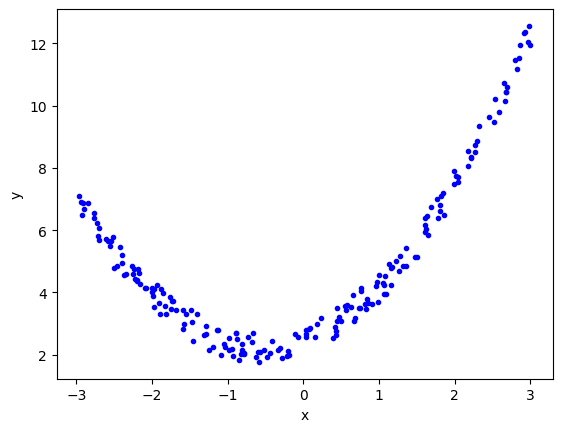

In [49]:
plt.plot(X,y ,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [50]:
x_train , x_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [51]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(x_test)
r2_score_lr = r2_score(y_test,y_pred)
print("R2_Score is = ",r2_score_lr)
print(y_pred)

R2_Score is =  0.3220000712774971
[[5.57555915]
 [4.28163052]
 [3.11648059]
 [3.24922453]
 [3.41577426]
 [5.54712119]
 [5.83905835]
 [4.37437348]
 [4.36752611]
 [5.89464428]
 [4.67579462]
 [6.1355467 ]
 [6.14252514]
 [4.61099913]
 [3.28206089]
 [3.96943739]
 [3.09419324]
 [3.55527487]
 [3.42593229]
 [5.65038268]
 [6.92606211]
 [3.89900604]
 [3.33527283]
 [6.80084756]
 [4.76560115]
 [4.95161003]
 [6.65322501]
 [5.16201583]
 [7.09100637]
 [2.83063345]
 [5.65736087]
 [5.49896046]
 [5.10975929]
 [6.6594795 ]
 [5.1016187 ]
 [3.75275951]
 [5.82282889]
 [6.6795429 ]
 [6.36629528]
 [7.21850277]]


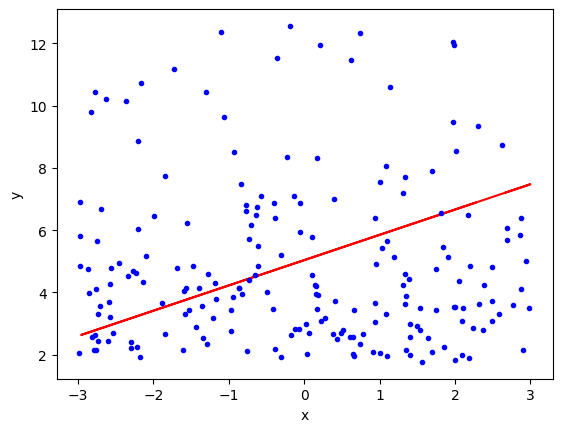

In [53]:
plt.plot(x_train, lr.predict(x_train),color = "r")
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**PolyNomial Regression** 

In [54]:
poly = PolynomialFeatures(degree=2 , include_bias=True)

x_train_trans = poly.fit_transform(x_train)
x_test_transform = poly.transform(x_test)

In [55]:
print(x_train[0])

[2.27160231]


In [56]:
print(x_train_trans[0])

[1.         2.27160231 5.16017706]


In [57]:
lr2 = LinearRegression()
lr2.fit(x_train_trans,y_train)

LinearRegression()

In [58]:
y_pred2 = lr2.predict(x_test_transform)

In [59]:
r2_score_poly = r2_score(y_test,y_pred2)
print(r2_score_poly)

0.9847095904682336


In [60]:
print(lr2.coef_)

[[0.         0.86760458 0.81663039]]


In [61]:
print(lr2.intercept_)

[2.46085225]


In [65]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr2.predict(x_new_poly)

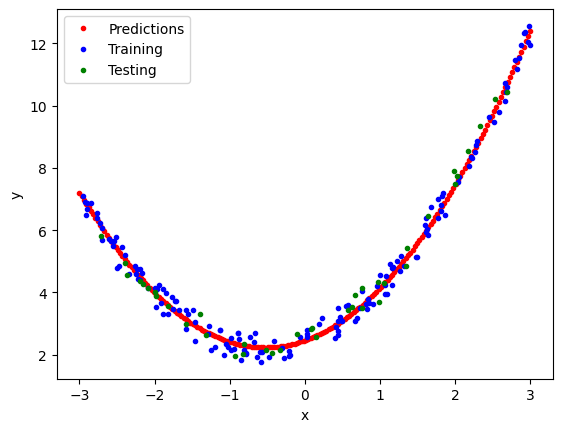

In [66]:
plt.plot(x_new,y_new,"r." , linewidth=2,label="Predictions")
plt.plot(x_train,y_train,"b." , linewidth=2,label="Training")
plt.plot(x_test,y_test,"g." , linewidth=2,label="Testing")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [67]:
def polynomial_regression(degree):
    x_new = np.linspace(-3,3,200).reshape(200,1)
    x_new_poly = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree=degree , include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features" , polybig_features),
        ("StandardScaler", std_scaler),
        ("lin_reg" , lin_reg)
    ])

    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new,y_newbig,"r", label = "degree" +str(degree) ,linewidth=2)

    plt.plot(x_train,y_train,"b." , linewidth = 3)
    plt.plot(x_test,y_test ,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-3,3,0,10])
    plt.show()

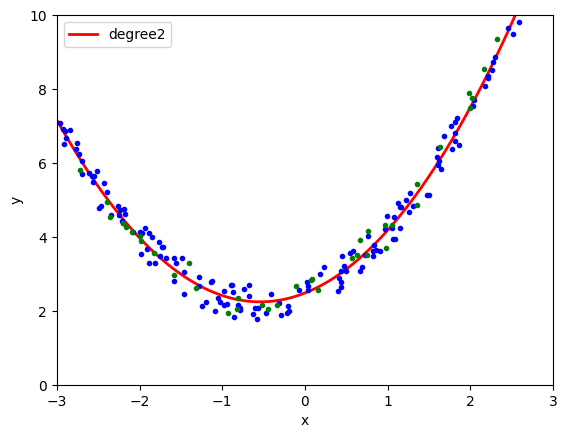

In [ ]:
polynomial_regression(2)

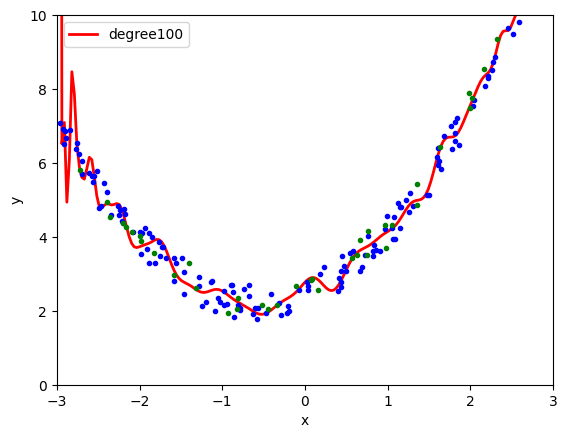

In [69]:
polynomial_regression(100)

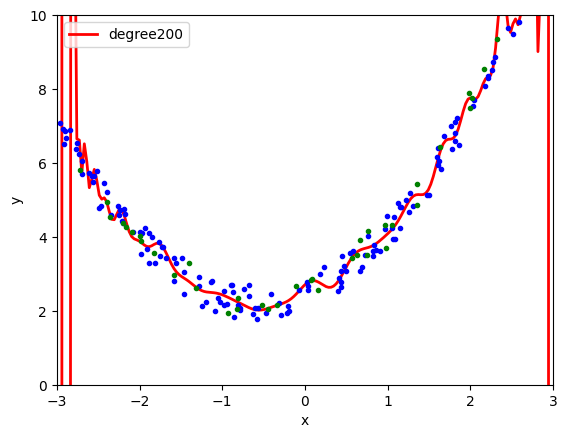

In [70]:
polynomial_regression(200)

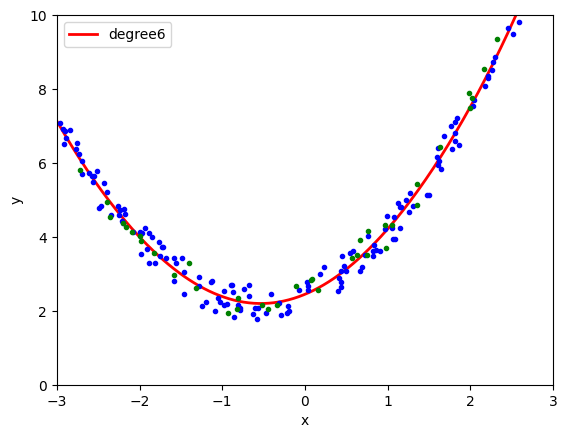

In [71]:
polynomial_regression(6)

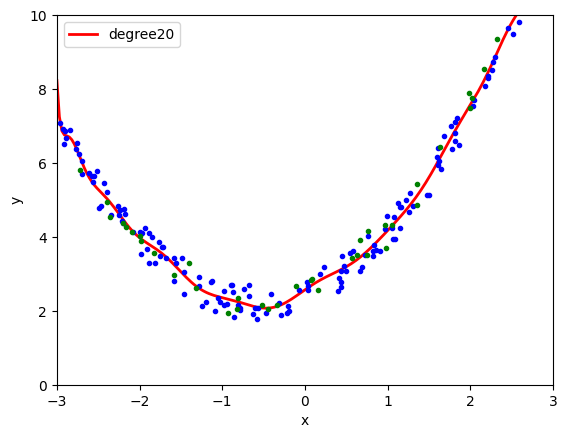

In [72]:
polynomial_regression(20)